# Know about your data

# csv file data

In [1]:
import pandas as pd 

churnData = pd.read_csv('churn.csv')
print('Training data dimension: ', churnData.shape)

Training data dimension:  (3333, 21)


.info() This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [2]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

.head()  returns a DataFrame holding the first 5 rows of df. 

In [3]:
churnData.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


.hist() A histogram is a representation of the distribution of data. 

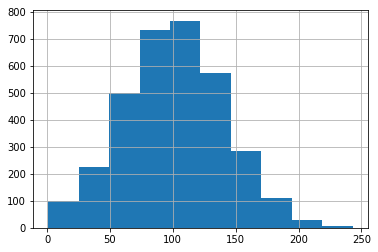

In [4]:
import matplotlib as plt
%matplotlib inline

churnData.account_length.hist()

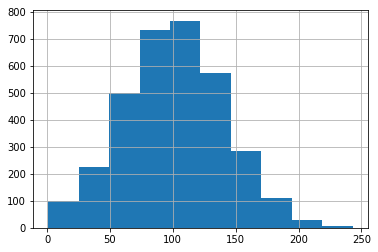

In [5]:
churnData['account_length'].hist() #same 

quintiles with qcut, the bins will be chosen so that you have the same number of records in each bin.

In [6]:
pd.qcut(churnData.account_length, q=[0,0.25,0.5,0.75,1], labels=['A1','A2','A3','A4']).head()

0    A4
1    A3
2    A4
3    A2
4    A2
Name: account_length, dtype: category
Categories (4, object): [A1 < A2 < A3 < A4]

In [9]:
pd.qcut(churnData.account_length, 5, labels=False).head()

0    3
1    2
2    4
3    1
4    1
Name: account_length, dtype: int64

In [10]:
pd.qcut(churnData.account_length, 5).head()

0    (111.0, 134.0]
1     (91.0, 111.0]
2    (134.0, 243.0]
3      (67.0, 91.0]
4      (67.0, 91.0]
Name: account_length, dtype: category
Categories (5, interval[float64]): [(0.999, 67.0] < (67.0, 91.0] < (91.0, 111.0] < (111.0, 134.0] < (134.0, 243.0]]

.select_dtypes Return a subset of the DataFrame’s columns based on the column dtypes.

To select all numeric types, use np.number or 'number'

To select strings you must use the object dtype, but note that this will return all object dtype columns

See the numpy dtype hierarchy

To select datetimes, use np.datetime64, 'datetime' or 'datetime64'

To select timedeltas, use np.timedelta64, 'timedelta' or 'timedelta64'

To select Pandas categorical dtypes, use 'category'

To select Pandas datetimetz dtypes, use 'datetimetz' (new in 0.20.0) or 'datetime64[ns, tz]'

In [11]:
churnData.select_dtypes(['object','bool']).describe()

,state,phone_number,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,408-5183,no,no,False
freq,106,1,3010,2411,2850


In [12]:
churnData.select_dtypes(exclude=['object','bool']).describe() # don't want to see object / bool type 

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


.astype change data type to others data type

In [13]:
churnData['area_code'] 

0       415
1       415
2       415
3       408
4       415
5       510
6       510
7       415
8       408
9       415
10      415
11      415
12      408
13      510
14      415
15      415
16      408
17      510
18      510
19      415
20      415
21      408
22      415
23      415
24      510
25      415
26      408
27      408
28      415
29      510
       ... 
3303    415
3304    510
3305    415
3306    408
3307    408
3308    415
3309    408
3310    415
3311    415
3312    408
3313    408
3314    415
3315    415
3316    510
3317    415
3318    415
3319    415
3320    510
3321    415
3322    408
3323    415
3324    415
3325    408
3326    415
3327    415
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area_code, Length: 3333, dtype: int64

In [12]:

churnData.select_dtypes(['object','bool']).describe()

,state,phone_number,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,408-5183,no,no,False
freq,106,1,3010,2411,2850


In [14]:
churnData['area_code'] = churnData.area_code.astype(str) #chage daya type
churnData.select_dtypes(['object','bool']).describe()

,state,area_code,phone_number,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333,3333
unique,51,3,3333,2,2,2
top,WV,415,344-5117,no,no,False
freq,106,1655,1,3010,2411,2850


.value_counts() The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [14]:
churnData.state.value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: state, dtype: int64

In [15]:
churnData.area_code.value_counts()
#churnData['area_code'].value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [16]:
churnData.international_plan.value_counts()
#churnData['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [17]:
churnData.voice_mail_plan.value_counts()
#churnData['voice_mail_plan']value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

In [18]:
churnData.churn.value_counts()
#churnData['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [19]:
churnData.voice_mail_plan.value_counts()
#churnData['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

.replace() method replaces a specified phrase with another specified phrase.

In [20]:
churnData.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
codebook = {'yes': 1, 'no': 0}
churnData_1 = churnData.replace(codebook)
churnData_1.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
churnData_1.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [23]:
churnData_2 = pd.get_dummies(churnData_1, columns=['state','area_code'])

In [24]:
churnData_2.head()

,account_length,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
0,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,1,0
1,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,1,0
2,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,1,0
3,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,1,0,0
4,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,1,0


In [25]:
churnData_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 73 columns):
account_length            3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null int64
voice_mail_plan           3333 non-null int64
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64
customer_service_calls    3333 non-null int64
churn                     3333 non-null bool
sta

In [26]:
churnData_X = churnData_2.drop(['churn','phone_number'], axis=1)
churnData_Y = churnData_2.churn
churnData_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 71 columns):
account_length            3333 non-null int64
international_plan        3333 non-null int64
voice_mail_plan           3333 non-null int64
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64
customer_service_calls    3333 non-null int64
state_AK                  3333 non-null uint8
state_AL                  3333 non-null uint8
sta

In [27]:
churnData_Y

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10       True
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3303    False
3304     True
3305    False
3306    False
3307    False
3308    False
3309    False
3310    False
3311    False
3312    False
3313    False
3314    False
3315    False
3316    False
3317    False
3318    False
3319    False
3320     True
3321    False
3322     True
3323     True
3324    False
3325    False
3326    False
3327    False
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

# Image data

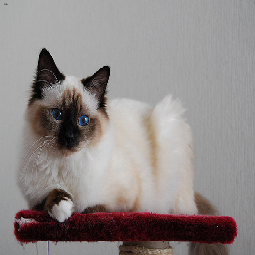

In [33]:
from keras.preprocessing import image
import numpy as np
img = image.load_img('cat/Birman.jpg',target_size =(255,255))
x = image.img_to_array(img)


img

In [29]:
x

array([[[171., 169., 170.],
        [171., 171., 171.],
        [169., 169., 169.],
        ...,
        [146., 150., 151.],
        [146., 147., 149.],
        [150., 152., 151.]],

       [[169., 169., 169.],
        [169., 169., 169.],
        [172., 172., 172.],
        ...,
        [146., 147., 149.],
        [143., 144., 146.],
        [143., 145., 144.]],

       [[171., 171., 171.],
        [170., 172., 171.],
        [173., 173., 173.],
        ...,
        [150., 150., 152.],
        [144., 145., 147.],
        [142., 142., 142.]],

       ...,

       [[137., 138., 140.],
        [138., 140., 139.],
        [137., 137., 137.],
        ...,
        [124., 122., 125.],
        [126., 126., 128.],
        [123., 123., 125.]],

       [[137., 139., 138.],
        [137., 139., 138.],
        [136., 138., 137.],
        ...,
        [123., 123., 125.],
        [126., 125., 130.],
        [122., 121., 126.]],

       [[135., 137., 136.],
        [135., 136., 138.],
        [134., 1

In [30]:
x.shape

(255, 255, 3)

In [31]:
x = x / 255.0
x     # this method call Normalized scale . Why we need to do that ???

array([[[0.67058825, 0.6627451 , 0.6666667 ],
        [0.67058825, 0.67058825, 0.67058825],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        ...,
        [0.57254905, 0.5882353 , 0.5921569 ],
        [0.57254905, 0.5764706 , 0.58431375],
        [0.5882353 , 0.59607846, 0.5921569 ]],

       [[0.6627451 , 0.6627451 , 0.6627451 ],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        [0.6745098 , 0.6745098 , 0.6745098 ],
        ...,
        [0.57254905, 0.5764706 , 0.58431375],
        [0.56078434, 0.5647059 , 0.57254905],
        [0.56078434, 0.5686275 , 0.5647059 ]],

       [[0.67058825, 0.67058825, 0.67058825],
        [0.6666667 , 0.6745098 , 0.67058825],
        [0.6784314 , 0.6784314 , 0.6784314 ],
        ...,
        [0.5882353 , 0.5882353 , 0.59607846],
        [0.5647059 , 0.5686275 , 0.5764706 ],
        [0.5568628 , 0.5568628 , 0.5568628 ]],

       ...,

       [[0.5372549 , 0.5411765 , 0.54901963],
        [0.5411765 , 0.54901963, 0.54509807],
        [0.5372549 , 0

others data 

- Text data

- Voice data